### Video Background Subtraction

In [75]:
data_folder = 'data'

In [76]:
# !pip install imageio

In [77]:
import imageio

In [78]:
# we read the video into a list of frames
reader = imageio.get_reader(os.path.join(data_folder,'highway.avi'))
frames = []
for i, im in enumerate(reader):
    frames.append(im)

NameError: name 'os' is not defined

In [ ]:
# number of frames
len(frames)

In [ ]:
# look at a frame
import matplotlib.pyplot as plt
% matplotlib inline
plt.imshow(frames[70])

In [60]:
# the dimensions of each frame
frames[0].shape

(240, 320, 3)

In [61]:
import numpy as np

In [62]:
import tensorly as tl

In [63]:
# convert the list of frames to a numpy array
vid_array = np.array(frames)
vid_array.shape

(1700, 240, 320, 3)

In [64]:
# create a video tensor
# for RAM considerations we will take only the first 100 slices, and the first channel
vid_tensor = tl.tensor(vid_array[:100,:,:,0])

#### Kruskal Decomposition

In [65]:
# kruskal decomposition is parafac in tensorly
from tensorly.decomposition import parafac

In [66]:
factors_kruskal = parafac(vid_tensor, rank = 15)

In [67]:
[print(f.shape) for f in factors_kruskal]

(100, 15)
(240, 15)
(320, 15)


[None, None, None]

In [68]:
full_tensor = tl.kruskal_to_tensor(factors_kruskal)

In [69]:
full_tensor.shape

(100, 240, 320)

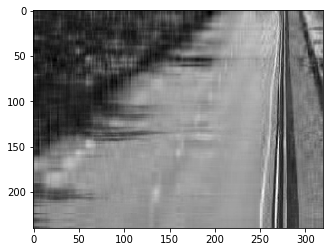

In [70]:
plt.imshow(np.floor((full_tensor[70,:,:])),cmap = 'gray')

Remarks:

* kruskal decomposition ran out of memory when run on 3 channels with more than 5 components
* with 5 components the result was bad - this shows the need for flexibility, we need more than 5 components to describe the spatial patterns, but only 2 components to separate the motion in time


#### Tucker Decomposition

In [71]:
from tensorly.decomposition import tucker

In [73]:
core, factors_tucker = tucker(vid_tensor, ranks=[1, 50, 50, 1])
print(core.shape)
[print(f.shape) for f in factors_tucker]

(1, 50, 50)
(100, 1)
(240, 50)
(320, 50)


[None, None, None]

In [52]:
full_tensor = tl.tucker_to_tensor(core, factors_tucker)

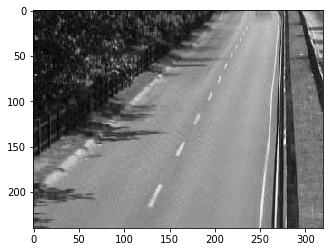

In [53]:
plt.imshow(full_tensor[70,:,:]/255,cmap = 'gray')